# 120 Years of Olympic Statistics
This dataset is available publicly, courtesy of Kaggle, and was originally scraped from www.sports-reference.com.  It covers some data of the modern Olympics starting in 1896, through Rio in 2016.  Ultimately, I hope it can give me a view into certain characteristics of world class Olympic athletes through time, and how they have (or have not) changed.

## Hypothesis:  the age, height, and weight of Olympic athletes has changed over time, moving toward some optimum range, unique to each event

   ### 1.  What have these stats looked like through time?  What, if any, are the differences between medalists and non-medalists?
   ### 2.  If they've changed, how so?  Are there apparent current trends?
   ### 3.  Where is age less of a factor to remain competitive?  Put another way, which events tend to have more older athletes?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's read in the data and have a look.  Where are there NaN's?  How about events that no longer run?

Filtering needs to happen, because things like Tug-Of-War are no longer events. I'll figure out what sort of core events have been present for all or most of the modern history.  Before that though, some very broad general statistics.

In [2]:
df = pd.read_csv('events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print(f"Age")
df.groupby('Sex')['Age'].describe()

Age


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,74098.0,23.732881,5.795252,11.0,20.0,23.0,27.0,74.0
M,187544.0,26.277562,6.474972,10.0,22.0,25.0,29.0,97.0


In [4]:
df.groupby('Sex')['Height', 'Weight'].describe()

Height                                                           \
        count        mean       std    min    25%    50%    75%    max   
Sex                                                                      
F     67378.0  167.839740  8.778528  127.0  162.0  168.0  173.0  213.0   
M    143567.0  178.858463  9.360318  127.0  172.0  179.0  185.0  226.0   

       Weight                                                      
        count       mean       std   min   25%   50%   75%    max  
Sex                                                                
F     66771.0  60.021252  10.21225  25.0  54.0  59.0  65.0  167.0  
M    141470.0  75.743677  13.21161  28.0  67.0  74.0  83.0  214.0

## Some decisions and rationale
Further evidence that I need to filter: the counts are different for these three metrics, so there's missing data.  I suspect that earlier in Olympic history, measurements weren't taken or recorded as completely.

Because of 2 World Wars, the Great Depression, more difficult travel, and a variety of other known and unknown factors, I think the earlier data are both spotty and not precisely accurate.  1960 was the first time the Olympics were televised in the US, marking a major milestone and influence.  I'm going to choose 1960 as the point when things had somewhat stabilized, both in the world as well as within the Olympics, at least in terms of consistent measurements.  There were many events that had already been dropped.  I'll look for a common core of events from then until the year 2000; if an event was being run up until 1960 as well as in 2000 (and after), it has a long history, and I'm choosing to call it a 'core' event.

The Olympics have continued to expand, but those events (new since 2000) won't have much history.  I need enough length to spot changes over time.  I expect not to see 70+ year-olds any more (see statistical summaries above), but wouldn't it be amazing if there were!

In [5]:
def get_intersection(list_a, list_b):
    """
    Return the intersection (no duplicates) of two lists.
    
    This finds items common to two lists and creates a single list containing only unique items.
    In this case, they're Olympic events that have occurred both before 1960 and after 2000, which tells
    me that they can be considered a 'core' event.
    """
    set_a, set_b = set(list_a), set(list_b)
    return [value for value in set_a if value in set_b] 


# Create lists of events up until 1960 and from 2000 on, then combine; yields events with 40+ year history
older_events = df[df.Year <= 1960]['Event']
recent_events = df[df.Year >= 2000]['Event']
core_events = get_intersection(older_events, recent_events)

# Create a new DataFrame that's been filtered by core_events
core_df = df[df.Event.isin(core_events)]

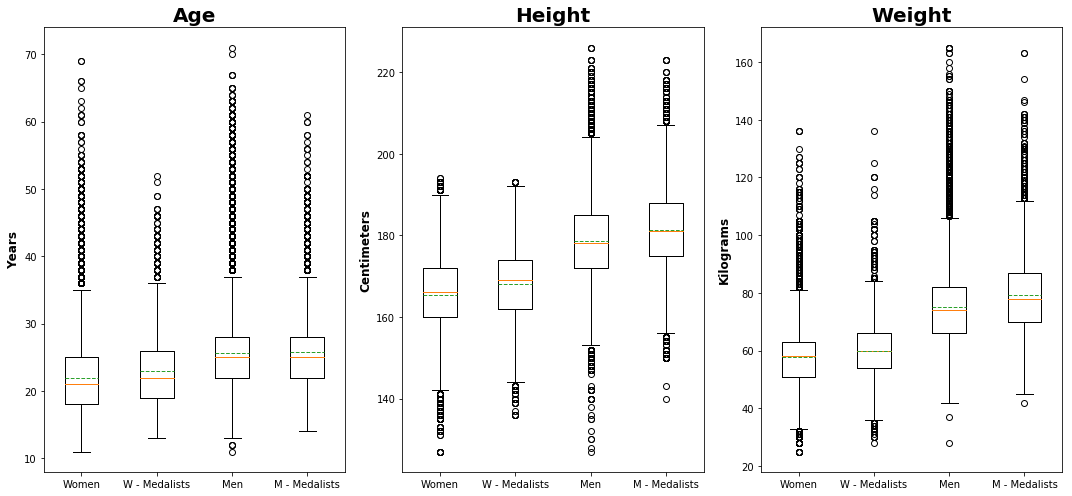

In [6]:
# Create a figure with 3 subplots: Age, Height, Weight.  Each will display female and male, and
# the general Olympic population (non-medalists) alongside medalists
plt.figure(figsize=(15, 7))
sexes = ['Women', 'W - Medalists', 'Men', 'M - Medalists']
titles = ['Age', 'Height', 'Weight']
metric = ['Years', 'Centimeters', 'Kilograms']

# Create dataframes just for each sex
men = pd.DataFrame(core_df.loc[core_df['Sex'] == 'M'])
women = pd.DataFrame(core_df.loc[core_df['Sex'] == 'F'])

# Dataframes for each sex but only medalists; using .dropna() is a near-perfect
# filter as there are relatively very few medalists
men_medals = pd.DataFrame(men).dropna()
women_medals = pd.DataFrame(women).dropna()

# dropna() is used here on the general lists, but only the column being displayed;
# I'm displaying fliers because it shows just how wide a range there is.
for count, title in enumerate(titles):
    plt.subplot(1, 3, count+1)
    plt.boxplot([women[title].dropna(),
                 women_medals[title],
                 men[title].dropna(),
                 men_medals[title]],
                 meanline=True, showmeans=True, showcaps=True, showfliers=True, labels=sexes)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.ylabel(metric[count], fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Insight: comparing medalists to non-medalists does show a trend toward older, taller, and heavier, with fewer outliers.
An exception seems to be with the age of male medalists, which looks roughly the same.  You can also sort of visually see that the standard deviation is generally larger for men, with a bit more variation amongst the competitors.

This partly answers question 1.

Let's drill down more.  Which events should we look at for trends?

In [7]:
# Look at our highest levels of participation (and team sports should be toward the top)
# I just selected what I thought might be representative events, but these lists could have ALL the events
# if desired, and as many/few plotted as are commented out.  Or do a random selection!
w_part = women['Event'].value_counts()[:50]
m_part  = men['Event'].value_counts()[:50]

# These can be added to/subtracted from or commented out as desired, depending on which events are wanted
w_events = ["Gymnastics Women's Team All-Around",
            "Fencing Women's Foil, Individual",
            "Swimming Women's 100 metres Freestyle",
            #"Athletics Women's Shot Put",
            "Figure Skating Women's Singles"]
            #"Speed Skating Women's 1,000 metres"]
m_events = ["Football Men's Football",
            "Gymnastics Men's Individual All-Around",
            #"Athletics Men's 100 metres",
            "Fencing Men's epee, Individual",
            "Alpine Skiing Men's Slalom"]
            #"Biathlon Men's 20 kilometres"]
#w_part
#m_part

In [8]:
# 1960 is where the NaN's really start to disappear, mostly good data from here on
decades = [year for year in range(1960, 2018, 4)]


def get_decade_mean(df, year, event, metric):
    """
    Return the mean of some metric of a specific event over a particular decade.
    
    This takes a dataframe, year, event, and metric (age, height, or weight).  The year is the upper
    bound of the decade, so 2000 would mean from 1991 to 2000.  
    """
    # These comparisons are broken with the operator leading, according to PEP8
    return df.loc[(df['Event'] == event)
                & (df['Year'] > year-10)
                & (df['Year'] <= year), metric].mean()


def get_event_means(df, yearspan, event, metric):
    """
    Return a list of means of one metric by decade, potentially spanning several decades.
    
    In this context, we're looking at age, height, or weight.  Each list item will represent the mean of
    that metric in a given decade, and will expand to represent as many decades as are in the yearspan.
    """
    means = []
    for decade in yearspan:
        means.append(get_decade_mean(df, decade, event, metric))
    return means


def all_event_means(df, yearspan, events, metric):
    """
    Return the collected means of all events in the yearspan in question.
    """
    event_means = []
    for event in events:
        event_means.append(get_event_means(df, yearspan, event, metric))
    return event_means


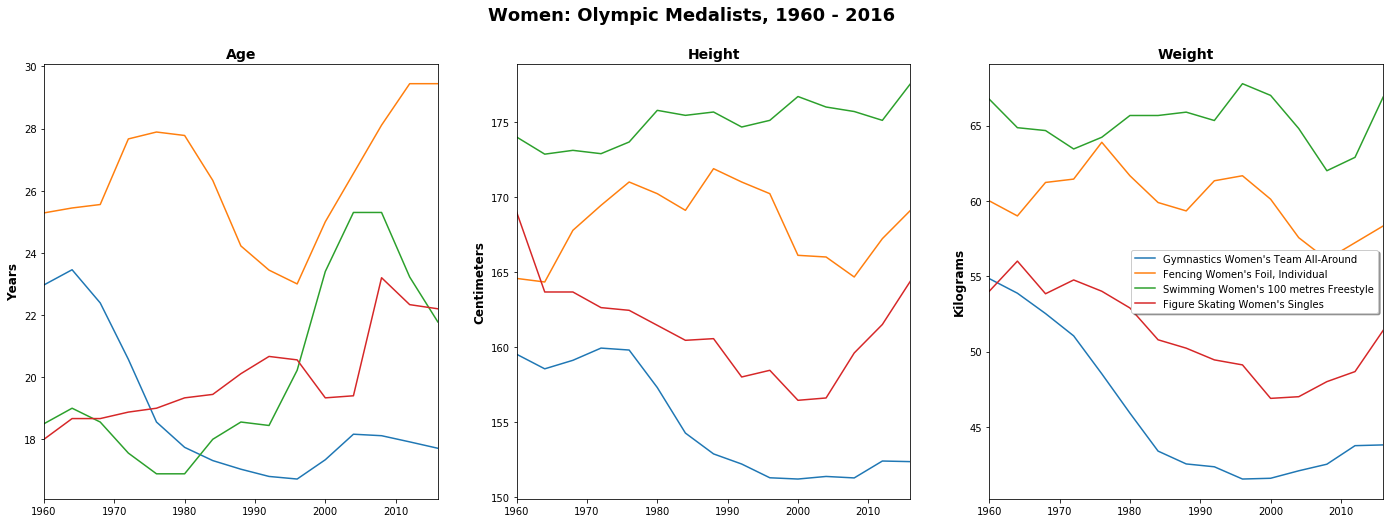

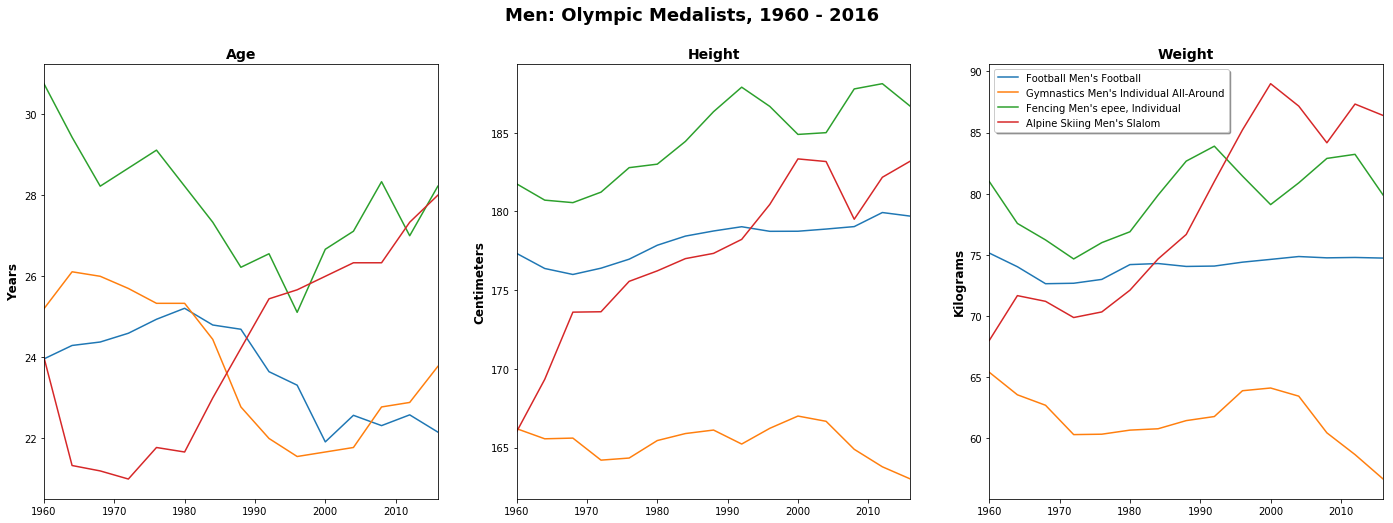

In [9]:
supers = ["Women: Olympic Medalists, 1960 - 2016",
          "Men: Olympic Medalists, 1960 - 2016"]
medals = [women_medals, men_medals]
events = [w_events, m_events]

# Create two figures, one for each sex, which will then get further partitioned
for i in range(len(supers)):
    plt.figure(figsize=(24, 8))
    plt.suptitle(supers[i], fontsize=18, fontweight='bold')

    # titles are [age, height, weight]; each gets its own subplot
    for count, title in enumerate(titles):
        plt.subplot(1, 3, count+1)
        means = all_event_means(medals[i], decades, events[i], title)
        
        for idx, event in enumerate(means):
            plt.plot(decades, means[idx], label=str(events[i][idx]))

        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel(metric[count], fontsize=12, fontweight='bold')
        plt.xlim(1960, 2016)
        
    plt.legend(fancybox=True, shadow=True, loc='best')
    plt.show()

This has the answer to the rest of question 1, though it doesn't show the general population, only medalists.

Question 2 is interesting: age is a little difficult to pin down, though it has certainly changed over time.  Height and weight do certainly seem to show trends, depending on which event and which sex.  For instance, men's football seems to have been nearn its optimum height/weight for a long time, and I'd speculate is unlikely to change; an NFL linebacker just won't excel at soccer!  But look at men's gymnastics, with a recent (since 2000) trend down in both, though age has increased.  A certain phenotype seems to be emerging.

I see an increase in height in both sexes in fencing, and speculate that height correlates to a longer armspan, which means an extra centimeter or two, potentially allowing you to hit your opponent while not getting hit.  Also, look at the changes in women's gymnastics....  It makes sense that smaller, lighter competitors will do better; as they get lighter, if strength is relatively unchanged, then their strength to weight ratio actually improves.

I also speculate that we're seeing the effect of more traditional strength training in women athletes, resulting in a recent rise in weight across the board.

In [137]:
w_older = pd.DataFrame(women.loc[(women['Year'] >= 2000) &
                                 (women['Age'] > 35) &
                                 (women['Sport'] != "Equestrianism"),
                                 ['Year', 'Name', 'Age', 'Sport', 'Event', 'Medal']])

w_older.dropna().groupby('Event').describe()
w_sport_totals = w_older.dropna().groupby('Sport')['Age'].count()
w_sports = list(w_sport_totals.index)
w_counts = list(w_sport_totals.values)

<Figure size 720x360 with 0 Axes>

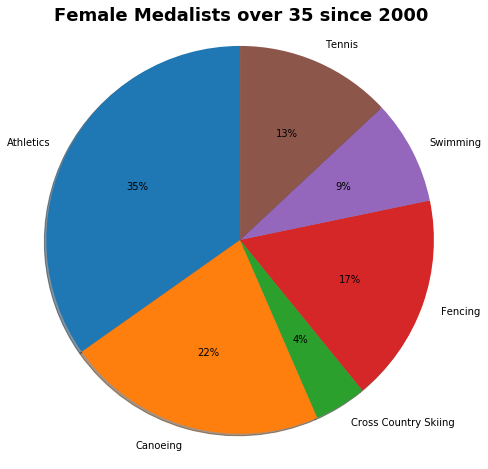

In [154]:
plt.figure(figsize=(10,5))
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(0,0,1,1.5)

ax1.pie(w_counts, labels=w_sports, autopct='%1.0f%%',
        shadow=True, startangle=90, radius=2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Female Medalists over 35 since 2000", fontsize=18, fontweight="bold")
plt.show()

In [156]:
# some would call this arbitrary, but I'm eliminating these sport categories, as they're less 
# directly athletic than other events, tending to have more older participants
m_older = pd.DataFrame(men.loc[(men['Year'] >= 2000) &
                               (men['Age'] > 38) & 
                               (men['Sport'] != "Shooting") &
                               (men['Sport'] != "Sailing") &
                               (men['Sport'] != "Equestrianism"), 
                               ['Year', 'Name', 'Age', 'Sport', 'Event', 'Medal']])

# using dropna() here will select only medalists
m_older.dropna().groupby('Event').describe()           # or .value_counts() or .count() or ......

# count of all male MEDALISTS over 38, since 2000
# switch commenting to include NON-MEDALISTS
m_sport_totals = m_older.dropna().groupby('Sport')['Age'].count()
#m_older.groupby('Sport')['Age'].count()
#m_older.nlargest(30, ['Age'])

m_sports = list(m_sport_totals.index)
m_counts = list(m_sport_totals.values)

<Figure size 720x360 with 0 Axes>

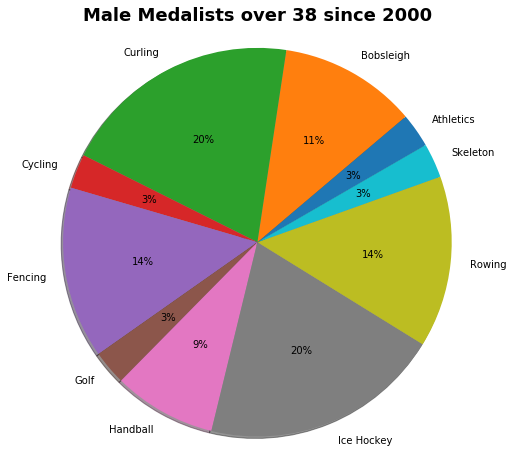

In [169]:
plt.figure(figsize=(10,5))
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(0,0,1,1.5)

ax1.pie(m_counts, labels=m_sports, autopct='%1.0f%%',
        shadow=True, startangle=30, radius=2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Male Medalists over 38 since 2000", fontsize=18, fontweight="bold")
plt.show()

You can see various sports categories for both women and men that have the highest percentages of medalists over 35 and 38, respectively.  I moved the number higher for men because they had more older competitors and more sports categories overall, so moving it to 38 made sense; the chart was too busy otherwise.  For both I took out various sports types like Equestrianism, which had large numbers of much older competitors, and Shooting and Sailing, for the same reasons.

There are far more older non-medalists still competing.  I imagine there are advances in sports medicine, nutrition, training methodologies, and other areas that allow a given athlete to compete longer.  It is an area that could be investigated.

## Future Research:
It would be especially interesting to get data about where records are being set/broken, and if any of the older medalists here are involved.  Cross-referencing the two could yield some interesting ideas and possible exploration.  Also, I'd be curious to see which countries are showing higher or lower numbers of older (or younger) medalists and competitors in general, and look into any deviation from the mean by country.

Another possibly fruitful direction would be differentiating between strength vs. speed vs. endurance sports (at least sports with a higher focus on one vs. another), and see if longevity is more associated in a some way.  Where are the age points (alternatively you could look at the limits of height or weight) that act as an asymptote or cutoff in a given event or sport?